## **Imports**

In [0]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [0]:
train_dataset = dsets.MNIST(root='/data', train=True, transform = transforms.ToTensor(), download = True)

# Download MNIST dataset, make it trainable, convert to Tensor

##**Visulalizing Dataset**

In [36]:
len(train_dataset)

60000

In [37]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [38]:
type(train_dataset[0])


tuple

In [39]:
# Input Matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [40]:
# Label
train_dataset[0][1]

5

###**Displaying MNIST**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [42]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [0]:
show_img = train_dataset[0][0].numpy().reshape(28,28)

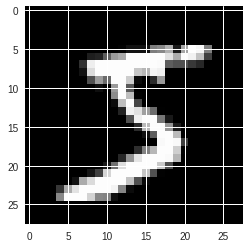

In [44]:
plt.imshow(show_img, cmap = 'gray')

##**Loading MNIST Test Dataset**

In [0]:
test_dataset = dsets.MNIST(root='/data', train=False, transform = transforms.ToTensor(), download = True)


In [46]:
len(test_dataset)

10000

In [0]:
# Test Dataset is same as Train Dataset

## **Make Dataset Iterable**

In [0]:
batch_size = 100
n_iters = 3000

In [49]:
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

### **Create Iterable Object: Training Dataset**

In [0]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

**Check iterbility**

In [51]:
import collections
isinstance(train_loader, collections.Iterable)

True

### **Create Iterable Object: Test Dataset**

In [0]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [53]:
isinstance(test_loader, collections.Iterable)

True

# **Building Model**

In [0]:
class LogisticRegressionModel(nn.Module):
  def __init__(self,input_dim, output_dim):
    super(LogisticRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
    
  def forward(self, x):
    out = self.linear(x)
    return out

Input dimension:
Size of Image = 28 x 28 = 784

Output Dimension
= 10
[0,1,2,3,4,5,6,7,8,9]


In [0]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

## **Instantiate Loss Class**

**Cross Entropy Loss**

In [0]:
lossfunc = nn.CrossEntropyLoss()

# CrossEntropyLoss() will compute softmax(logistic/softmax functions)
# and compute cross entropy

##**Instantiate Optimizer Class**

In [0]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

##**Parameters**

In [58]:
print(model.parameters())
print(len(list(model.parameters())))

# First parameter 
print(list(model.parameters())[0].size())

# Bias
print(list(model.parameters())[1].size())


<generator object Module.parameters at 0x7f05dc2e0fc0>
2
torch.Size([10, 784])
torch.Size([10])


#**Train Model**

In [60]:
iter = 0
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    
    

    # Load images as variable
    images = Variable(images.view(-1,28*28))
    labels = Variable(labels)
                      
    # Clear gradients
    optimizer.zero_grad()
                      
    # Forward pass
    outputs = model(images)
                      
    # Calculate Loss: softmax -> cross entropy loss
    loss = lossfunc(outputs, labels)
                      
    # Back prop
    loss.backward()
    
    # Updating Parameters
    optimizer.step()
                      
    
    iter+=1
         
    if iter%500 == 0:
      # Calculate Accuracy
      correct = 0
      total = 0    
      # Iterate through test dataset
      for images, labels in test_loader:
        
        
        # Load images to a torch variable
        images = Variable(images.view(-1,28*28))
             
        # Forward pass to get logits/output
        outputs = model(images)
                      
        # Get predictions from max value
        _, predicted = torch.max(outputs.data,1)
                      
        # Total number of labels
        total += labels.size(0)
                      

        # Total correct predictions
        correct += (predicted == labels).sum().item()
             
      accuracy = 100 * correct/total
   
      # Print Loss
      print('Iteration: {}, Loss: {}, Accuracy:{}'.format(iter, loss.data, accuracy))             

Iteration: 500, Loss: 0.9771254062652588, Accuracy:83.22
Iteration: 1000, Loss: 0.8389747142791748, Accuracy:83.71
Iteration: 1500, Loss: 0.8654516339302063, Accuracy:84.24
Iteration: 2000, Loss: 0.7522281408309937, Accuracy:84.6
Iteration: 2500, Loss: 0.7457367777824402, Accuracy:84.82
Iteration: 3000, Loss: 0.7690485119819641, Accuracy:85.04
